In [ ]:
%load_ext autoreload
%autoreload 2

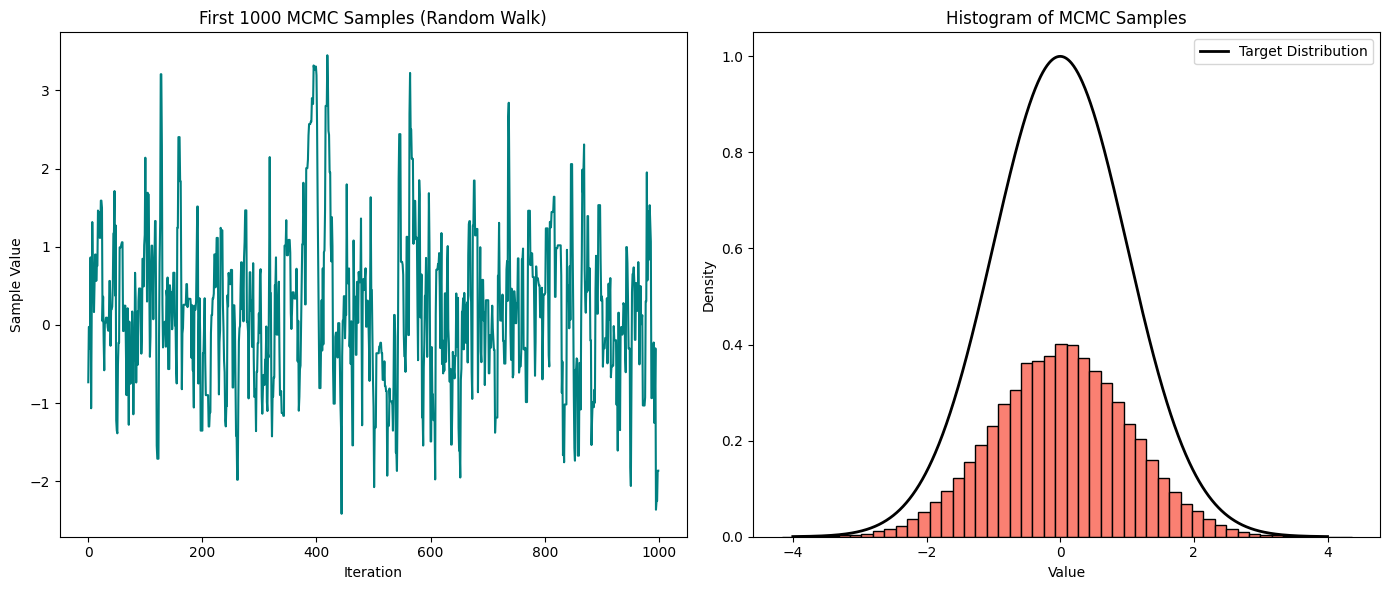

Estimated Mean (MCMC): 0.0165
Estimated Std Dev (MCMC): 1.0081


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Target distribution: Standard normal PDF (up to a constant factor)
def target_distribution(x):
    return np.exp(-0.5 * x**2)

# Metropolis-Hastings algorithm
n_samples = 100_000
samples = []
x_current = 0  # Start at 0

for _ in range(n_samples):
    x_proposed = x_current + np.random.normal(0, 1)  # Proposal step
    acceptance_ratio = target_distribution(x_proposed) / target_distribution(x_current)

    if np.random.rand() < acceptance_ratio:
        x_current = x_proposed  # Accept the proposal
    samples.append(x_current)

# Plot the results
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(samples[:1000], color='teal')
plt.title('First 1000 MCMC Samples (Random Walk)')
plt.xlabel('Iteration')
plt.ylabel('Sample Value')

plt.subplot(1, 2, 2)
plt.hist(samples, bins=50, color='salmon', edgecolor='black', density=True)
x = np.linspace(-4, 4, 1000)
plt.plot(x, target_distribution(x), color='black', linewidth=2, label='Target Distribution')
plt.title('Histogram of MCMC Samples')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.show()

# Estimate mean and standard deviation
mean_mcmc = np.mean(samples)
std_mcmc = np.std(samples)

print(f"Estimated Mean (MCMC): {mean_mcmc:.4f}")
print(f"Estimated Std Dev (MCMC): {std_mcmc:.4f}")

# Quantile function

In [2]:
import numpy as np

data = [10, 20, 30, 40, 50]

# Default method (linear interpolation)
q25_default = np.quantile(data, 0.25)
q50_default = np.quantile(data, 0.5)

# Different interpolation options
q25_lower = np.quantile(data, 0.25, method='lower')
q25_higher = np.quantile(data, 0.25, method='higher')
q25_nearest = np.quantile(data, 0.25, method='nearest')
q25_midpoint = np.quantile(data, 0.25, method='midpoint')

print(f"Default (linear interpolation) 25th percentile: {q25_default}")
print(f"Lower 25th percentile: {q25_lower}")
print(f"Higher 25th percentile: {q25_higher}")
print(f"Nearest 25th percentile: {q25_nearest}")
print(f"Midpoint 25th percentile: {q25_midpoint}")

Default (linear interpolation) 25th percentile: 20.0
Lower 25th percentile: 20
Higher 25th percentile: 20
Nearest 25th percentile: 20
Midpoint 25th percentile: 20.0


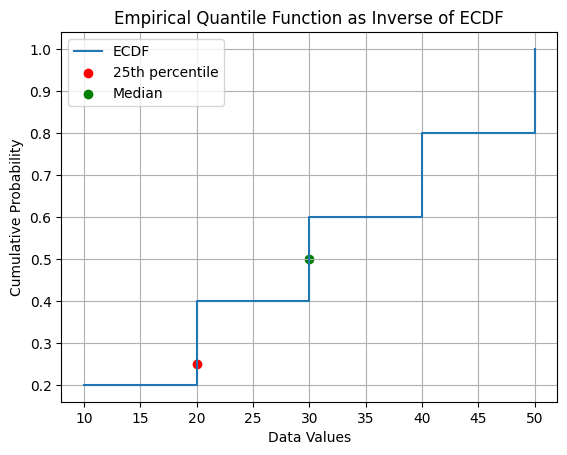

In [3]:
import matplotlib.pyplot as plt

# Empirical CDF
sorted_data = np.sort(data)
ecdf = np.arange(1, len(data) + 1) / len(data)

# Plot
plt.step(sorted_data, ecdf, where="post", label="ECDF")
plt.scatter(q25_default, 0.25, color='red', label="25th percentile")
plt.scatter(q50_default, 0.5, color='green', label="Median")

plt.xlabel("Data Values")
plt.ylabel("Cumulative Probability")
plt.legend()
plt.grid(True)
plt.title("Empirical Quantile Function as Inverse of ECDF")
plt.show()